<a href="https://colab.research.google.com/github/abhinavteja123/Machine-Learning-Labs-/blob/main/LAB_8_AP23110010233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('Libraries imported successfully!')

Libraries imported successfully!


In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile('/content/deliveries.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

deliveries = pd.read_csv('/content/deliveries.csv')
print('Dataset loaded successfully!')
print(f'Shape: {deliveries.shape}')
print(f'Columns: {list(deliveries.columns)}')

Dataset loaded successfully!
Shape: (260920, 17)
Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


In [ ]:
print('='*60)
print('IPL DELIVERIES DATASET OVERVIEW')
print('='*60)
print('\n--- First 5 rows ---')
print(deliveries.head())
print('\n--- Dataset Information ---')
print(f'Total Deliveries: {len(deliveries)}')
print(f'Columns: {deliveries.shape[1]}')
print(f'\nColumn Names:')
for i, col in enumerate(deliveries.columns, 1):
    print(f'{i}. {col}')
print('\n--- Missing Values ---')
print(deliveries.isnull().sum()[deliveries.isnull().sum() > 0])

IPL DELIVERIES DATASET OVERVIEW

--- First 5 rows ---
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type 

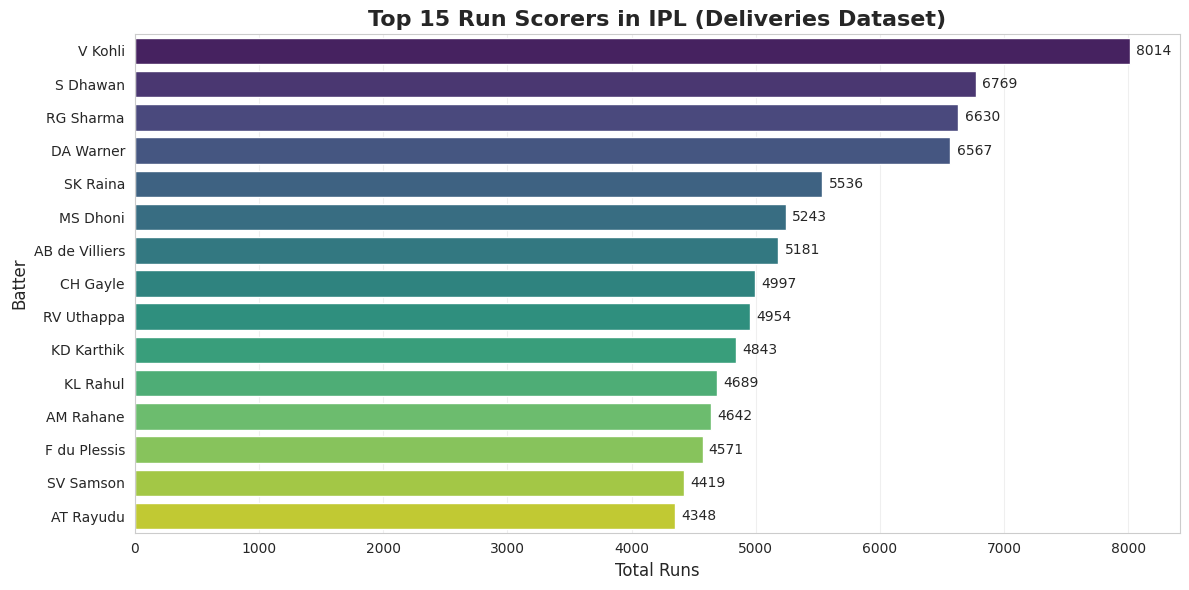


Top 5 Run Scorers:
batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64


In [ ]:
# Top Run Scorers
top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='viridis')
plt.title('Top 15 Run Scorers in IPL (Deliveries Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batter', fontsize=12)
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_scorers.values):
    plt.text(v + 50, i, str(v), va='center')
plt.tight_layout()
plt.show()
print(f'\nTop 5 Run Scorers:')
print(top_scorers.head())

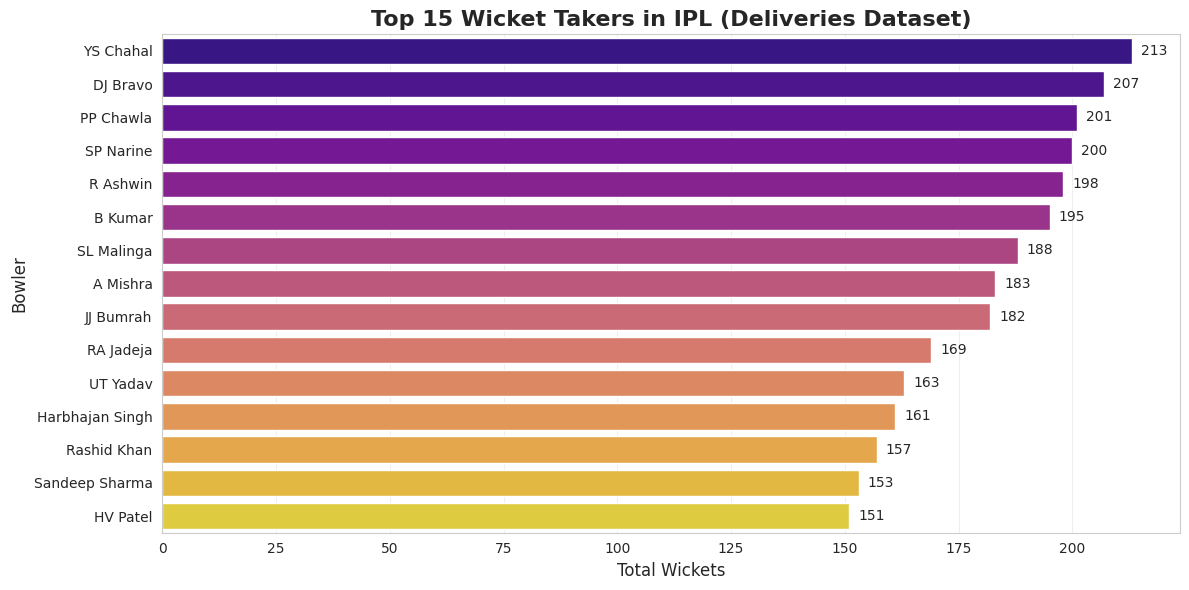


Top 5 Wicket Takers:
bowler
YS Chahal    213
DJ Bravo     207
PP Chawla    201
SP Narine    200
R Ashwin     198
dtype: int64


In [ ]:
# Top Wicket Takers
top_bowlers = deliveries[deliveries['is_wicket']==1].groupby('bowler').size().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='plasma')
plt.title('Top 15 Wicket Takers in IPL (Deliveries Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Total Wickets', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_bowlers.values):
    plt.text(v + 2, i, str(v), va='center')
plt.tight_layout()
plt.show()
print(f'\nTop 5 Wicket Takers:')
print(top_bowlers.head())

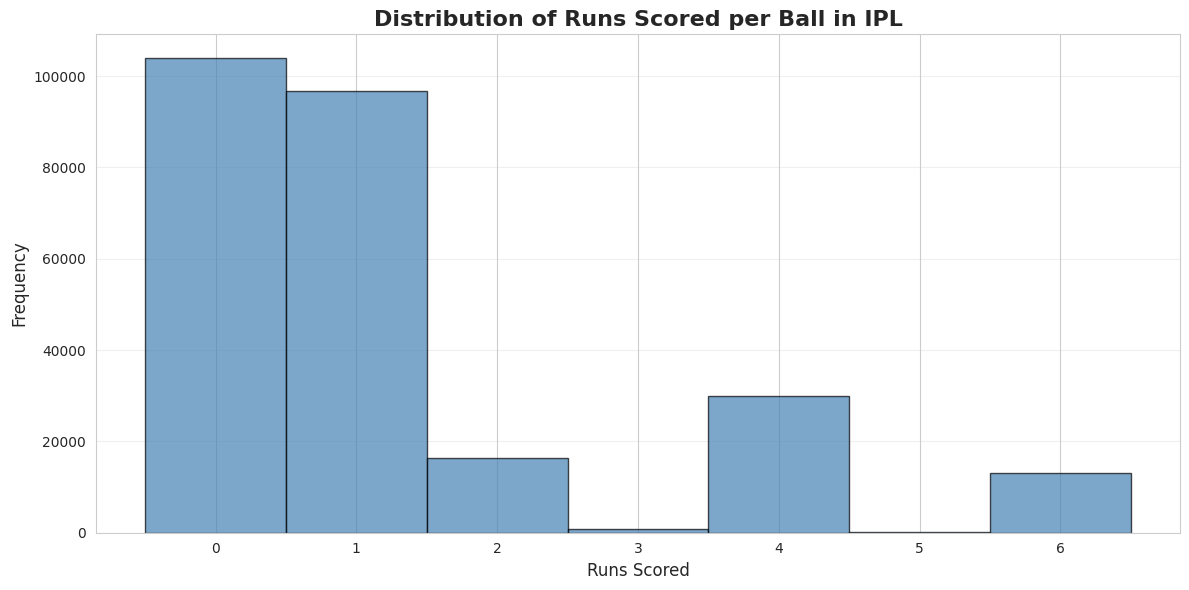


Runs per Ball Statistics:
Total balls: 260920
Average runs per ball: 1.27
Most common: 0 runs


In [ ]:
# Distribution of Runs per Ball
plt.figure(figsize=(12, 6))
runs_data = deliveries['batsman_runs']
plt.hist(runs_data, bins=range(0,8), color='steelblue', edgecolor='black', alpha=0.7, align='left')
plt.title('Distribution of Runs Scored per Ball in IPL', fontsize=16, fontweight='bold')
plt.xlabel('Runs Scored', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0,7))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(f'\nRuns per Ball Statistics:')
print(f'Total balls: {len(runs_data)}')
print(f'Average runs per ball: {runs_data.mean():.2f}')
print(f'Most common: {runs_data.mode().values[0]} runs')

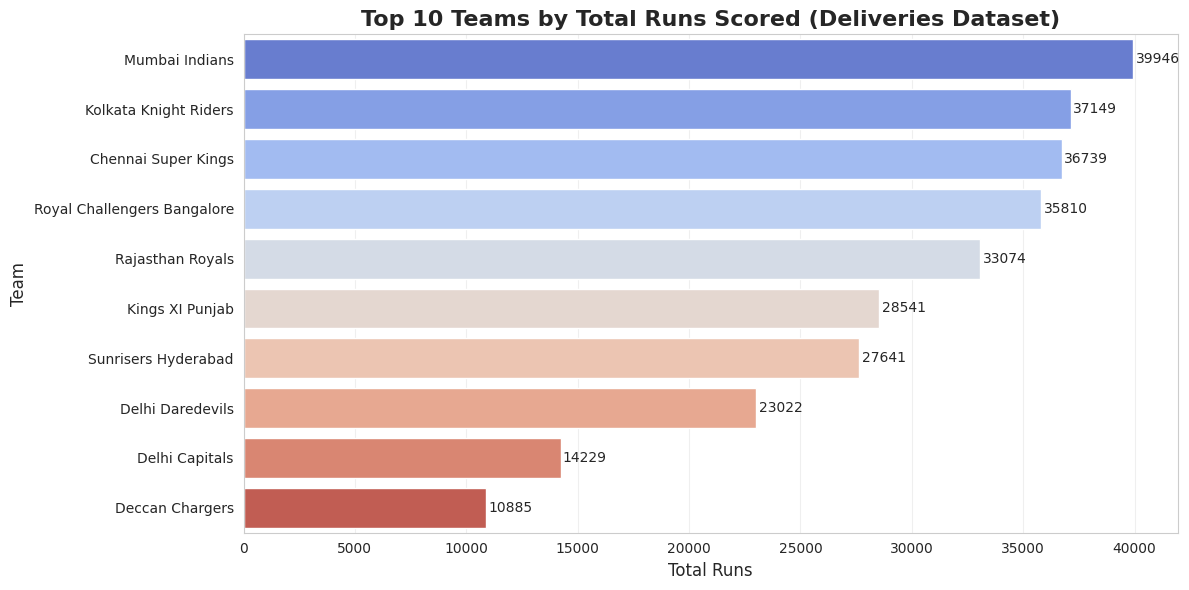


Top 5 Teams by Runs Scored:
batting_team
Mumbai Indians                 39946
Kolkata Knight Riders          37149
Chennai Super Kings            36739
Royal Challengers Bangalore    35810
Rajasthan Royals               33074
Name: batsman_runs, dtype: int64


In [ ]:
# Most Successful Batting Teams
batting_runs = deliveries.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=batting_runs.values, y=batting_runs.index, palette='coolwarm')
plt.title('Top 10 Teams by Total Runs Scored (Deliveries Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(batting_runs.values):
    plt.text(v + 100, i, str(v), va='center')
plt.tight_layout()
plt.show()
print(f'\nTop 5 Teams by Runs Scored:')
print(batting_runs.head())

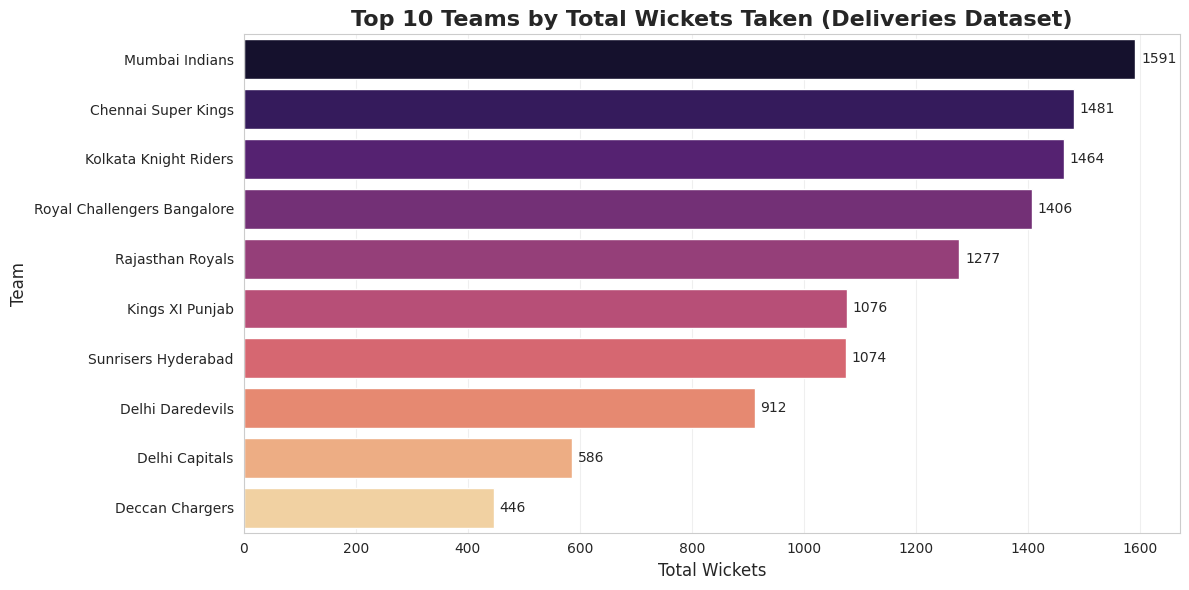


Top 5 Teams by Wickets Taken:
bowling_team
Mumbai Indians                 1591
Chennai Super Kings            1481
Kolkata Knight Riders          1464
Royal Challengers Bangalore    1406
Rajasthan Royals               1277
dtype: int64


In [ ]:
# Most Successful Bowling Teams (by wickets taken)
bowling_wickets = deliveries[deliveries['is_wicket']==1].groupby('bowling_team').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bowling_wickets.values, y=bowling_wickets.index, palette='magma')
plt.title('Top 10 Teams by Total Wickets Taken (Deliveries Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Total Wickets', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(bowling_wickets.values):
    plt.text(v + 10, i, str(v), va='center')
plt.tight_layout()
plt.show()
print(f'\nTop 5 Teams by Wickets Taken:')
print(bowling_wickets.head())